# Depth map

In [4]:
import cv2
import numpy as np
depth = cv2.imread("/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-16-18-44-24/depth_adds/0000029783.png")

In [5]:
depth[:,:,1].shape

(960, 1280)

In [186]:
def contrast_stretching(image, low_percentile=1, high_percentile=75):
    # Calculate the lower and upper percentiles of the image
    low_val = np.percentile(image, low_percentile)
    high_val = np.percentile(image, high_percentile)

    # Clip the image values to the desired percentile range
    image = np.clip(image, low_val, high_val)

    # Normalize the image to the range [0, 1]
    image = (image - low_val) / (high_val - low_val)

    return image

In [10]:
test_depth = cv2.imread("/media/aiteam/DataAI/depth_datasets/epe/epe-depth/depth/night-0096/96-20220815160350025_depth.png")
test_depth = test_depth[:,:,0]

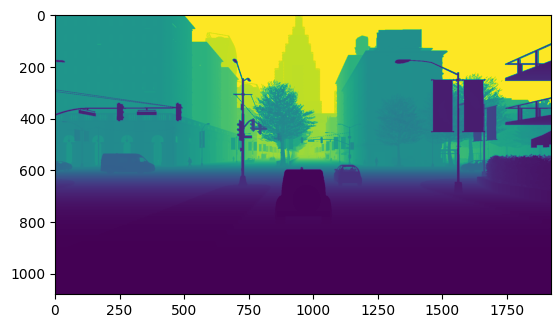

In [11]:
plt.imshow(test_depth)
plt.show()

In [56]:
adv_depth = test_depth
adv_depth = adv_depth[220:800, 250:1500]
adv_depth = cv2.resize(adv_depth, (512, 256))
adv_depth = np.clip(adv_depth, 1.0, 100.0)
adv_depth = 1 / adv_depth

In [57]:
adv_depth

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.2 , 0.2 , 0.2 , ..., 0.2 , 0.2 , 0.2 ],
       [0.2 , 0.2 , 0.2 , ..., 0.2 , 0.2 , 0.2 ],
       [0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25]])

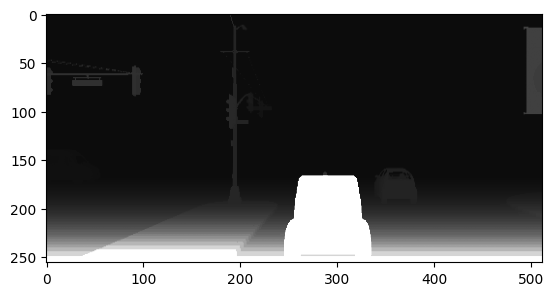

In [45]:
plt.imshow(adv_depth, cmap='gray', vmin=0, vmax=0.2)
plt.show()

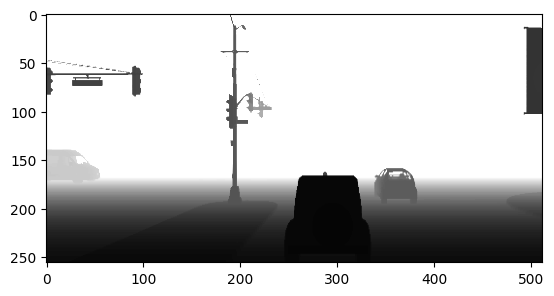

In [39]:
plt.imshow(adv_depth, cmap='gray', vmin=0, vmax=100)
plt.show()

In [29]:
mask = adv_depth > 2

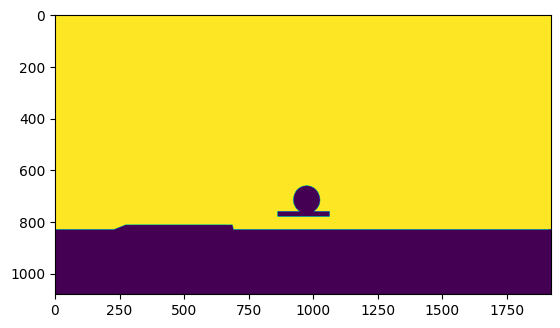

In [30]:
plt.imshow(mask)
plt.show()

In [113]:
def find_min_y_coordinate(image):
    min_y = float('inf')  # Initialize min_y to a large value

    # Iterate through the rows of the image
    for y, row in enumerate(image):
        # Iterate through the columns of the row
        for x, value in enumerate(row):
            # Check if the pixel value is 0
            if value == 0:
                # Update min_y if the current y-coordinate is lower
                min_y = min(min_y, y)

    return min_y

In [114]:
find_min_y_coordinate(mask)

880

In [136]:
adv_depth

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]])

In [51]:
def disp_to_depth(disp, min_depth, max_depth):
    min_disp = 1 / max_depth  # 0.01
    max_disp = 1 / min_depth  # 10
    scaled_disp = min_disp + (max_disp - min_disp) * disp  # (10-0.01)*disp+0.01
    depth = 1 / scaled_disp
    return scaled_disp, depth

In [65]:
disp_to_depth(adv_depth, 0.1, 100)

(array([[0.1099, 0.1099, 0.1099, ..., 0.1099, 0.1099, 0.1099],
        [0.1099, 0.1099, 0.1099, ..., 0.1099, 0.1099, 0.1099],
        [0.1099, 0.1099, 0.1099, ..., 0.1099, 0.1099, 0.1099],
        ...,
        [2.008 , 2.008 , 2.008 , ..., 2.008 , 2.008 , 2.008 ],
        [2.008 , 2.008 , 2.008 , ..., 2.008 , 2.008 , 2.008 ],
        [2.5075, 2.5075, 2.5075, ..., 2.5075, 2.5075, 2.5075]]),
 array([[9.09918107, 9.09918107, 9.09918107, ..., 9.09918107, 9.09918107,
         9.09918107],
        [9.09918107, 9.09918107, 9.09918107, ..., 9.09918107, 9.09918107,
         9.09918107],
        [9.09918107, 9.09918107, 9.09918107, ..., 9.09918107, 9.09918107,
         9.09918107],
        ...,
        [0.49800797, 0.49800797, 0.49800797, ..., 0.49800797, 0.49800797,
         0.49800797],
        [0.49800797, 0.49800797, 0.49800797, ..., 0.49800797, 0.49800797,
         0.49800797],
        [0.39880359, 0.39880359, 0.39880359, ..., 0.39880359, 0.39880359,
         0.39880359]]))

In [48]:
test_depth

array([[133, 133, 133, ..., 255, 255, 255],
       [133, 133, 133, ..., 255, 255, 255],
       [133, 133, 133, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

# Crop Image

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [82]:
img = cv2.imread("/media/aiteam/DataAI/depth_datasets/oxford_raw/2014-12-16-18-44-24/rgb/1418756093820316.png")

In [83]:
class CenterCrop:
    """
    Center crop a given image
    """

    def __init__(self, *size):
        """
        Initialize
        :param width: crop width
        :param height: crop height
        """
        self.w, self.h = size

    def __call__(self, *imgs, inplace=False, unpack=True):
        """
        Process
        :param imgs: 'channel last' images to process
        :param inplace: whether to process image in place
        :param unpack:
        :return:
        """
        # assert
        assert len(imgs) > 0
        # shape
        h, w = imgs[0].shape[:2]
        # h range
        h_start = max((w - self.w) // 2, 0)
        h_end = min(h_start + self.w, w)
        # v range
        v_start = max((h - self.h) // 2, 0)
        v_end = min(v_start + self.h, h)
        # store results
        results = []
        # process others
        for img in imgs:
            # img result
            if inplace:
                img_result = img[v_start: v_end, h_start: h_end]
            else:
                img_result = img[v_start: v_end, h_start: h_end].copy()
            # append to result
            results.append(img_result)
        # handle results
        if unpack and len(results) == 1:
            results = results[0]
        # return
        return results


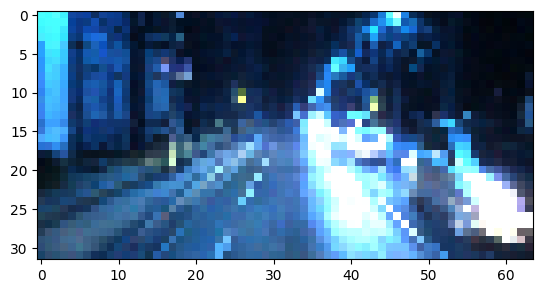

In [103]:
CROP_SIZE = (1140, 512)

crop = CenterCrop(*CROP_SIZE)
img_crop = crop(img)
img_crop = cv2.resize(img_crop, (256,128), interpolation=cv2.INTER_LINEAR)
plt.imshow(img_crop)

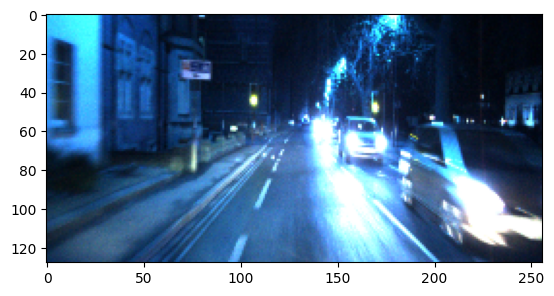

In [97]:
CROP_SIZE = (1280, 512)

crop = CenterCrop(*CROP_SIZE)
img_crop = crop(img)
img_crop = cv2.resize(img_crop, (256,128), interpolation=cv2.INTER_LINEAR)
plt.imshow(img_crop)

# Test seed dataset

In [6]:
from datasets import build_dataset
import random
import numpy as np
import torch
from pytorch_lightning import seed_everything
from mmcv import Config
import os.path as osp
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

In [2]:
seed = 1024
# configure seed
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
seed_everything(seed)

cfg = Config.fromfile(osp.join(f'configs/steps_rc.yaml'))
cfg.test = True
cfg.seed = seed

#prepare data loader
dataset = build_dataset(cfg.dataset)
loader = DataLoader(dataset, 2, shuffle=False, num_workers=1, drop_last=True)


Global seed set to 1024


Root: day, Frames: [0, -1, 1], Augment: True, DownScale: True, Equ_Limit: 0.009.
Total items: 21258.
Root: night, Frames: [0, -1, 1], Augment: True, DownScale: True, Equ_Limit: 0.009.
Total items: 19600.
Master: night, Shuffle: True, Length: 19600.


In [3]:
# Display a few images from the dataset
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


In [4]:
dataiter = iter(loader)


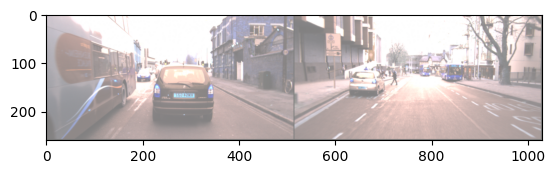

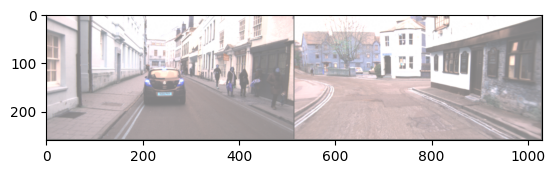

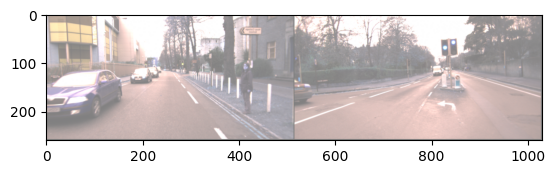

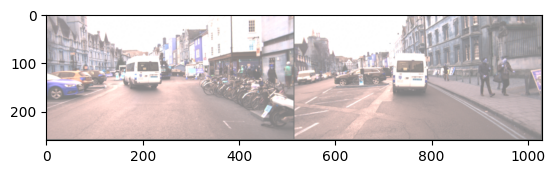

KeyboardInterrupt: 

In [5]:
for data in dataiter:
#     print(data['day']['color_aug', 0, 0].shape)
    imshow(torchvision.utils.make_grid(data['day']['color_aug', 0, 0]))
#     stop

In [ ]:
start_time = time.time()
for data in dataiter:
    count = 0
#     print(data['day']['color_aug', 0, 0])
#     imshow(torchvision.utils.make_grid(data['day']['color_aug', 0, 0]))
#     stop
stop_time = time.time()

In [ ]:
stop_time - start_time

In [ ]:
from pytorch_lightning import LightningModule
from .registry import MODELS

In [ ]:
def build_disp_net(option, check_point_path):
    # create model
    model: pytorch_lightning.LightningModule = MODELS.build(name=option.model.name, option=option)
    model.load_state_dict(torch.load(check_point_path, map_location='cpu')['state_dict'])
    model.freeze()
    model.eval()

    # return
    return model


In [ ]:
self.day_dispnet = build_disp_net(
    Config.fromfile(osp.join('configs/', f'{self.opt.day_config}.yaml')),
    self.opt.day_check_point
)

In [ ]:
with torch.no_grad():
            day_disp = self.day_dispnet(day_inputs)['disp', 0, 0]